https://www.oreilly.com/catalog/errata.csp?isbn=0636920142874

In [1]:
import tensorflow as tf;
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt


print(f'tensorflow version: {tf.__version__}')
print(f'keras version: {keras.__version__}')
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

tensorflow version: 2.9.1
keras version: 2.9.0
Num GPUs Available:  1


---

In [2]:
import numpy as np
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

# activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

In [3]:
np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})

In [4]:
z = np.array([-1, 0, 0.1, 0.5, 0.9, 1, 2])
print(z)
print(relu(z))
print(derivative(relu, z))

[-1.000000 0.000000 0.100000 0.500000 0.900000 1.000000 2.000000]
[0.000000 0.000000 0.100000 0.500000 0.900000 1.000000 2.000000]
[0.000000 0.500000 1.000000 1.000000 1.000000 1.000000 1.000000]


In [5]:
eps=0.000001
print(relu(0 + eps))
print(relu(0 - eps))
print(relu(0 + eps) - relu(0 - eps))
print(2*eps)
print(1e-06 / (2*eps))

1e-06
0.0
1e-06
2e-06
0.5


---

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
y_train_full.shape

(60000,)

In [9]:
# category of clothing
y_train_full[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [10]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [11]:
len(X_test)

10000

In [12]:
X_test[0].reshape(-1, 1)[0:300]

array([[0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.00

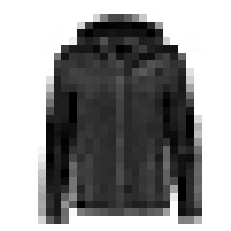

In [13]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [15]:
class_names[y_train[0]]

'Coat'

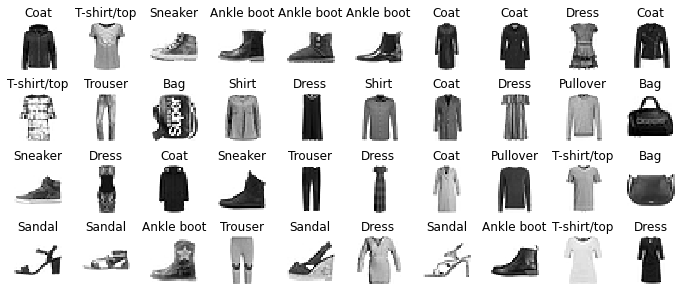

In [16]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2022-07-08 03:52:50.564686: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-08 03:52:51.085429: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10399 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:05:00.0, compute capability: 6.1


In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [22]:
# note the 1719 shown during training is not training size it is number of batches
len(X_train) / 32

1718.75

In [23]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2208 - accuracy: 0.9216 - val_loss: 0.2966 - val_accuracy: 0.8884
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2181 - accuracy: 0.9219 - val_loss: 0.3005 - val_accuracy: 0.8916
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2142 - accuracy: 0.9232 - val_loss: 0.3167 - val_accuracy: 0.8848
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2104 - accuracy: 0.9257 - val_loss: 0.3017 - val_accuracy: 0.8912
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2074 - accuracy: 0.9259 - val_loss: 0.2920 - val_accuracy: 0.8932
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2041 - accuracy: 0.9276 - val_loss: 0.2960 - val_accuracy: 0.8920
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2014 - accuracy: 0.9281 - val_loss: 0.2964 - val_accuracy:

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

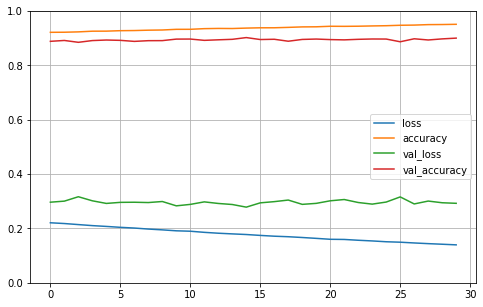

In [25]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [30]:
# note the 313 shown during training is not training size it is number of batches
len(X_test) / 32

312.5

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3414 - accuracy: 0.8917


[0.3414066731929779, 0.891700029373169]

In [32]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 111ms/step


array([[0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 1.000000],
       [0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000],
       [0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000]], dtype=float32)

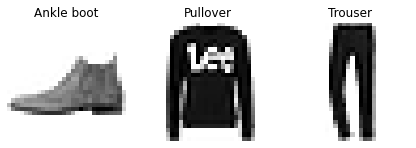

In [33]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

https://stackoverflow.com/questions/68776790/model-predict-classes-is-deprecated-what-to-use-instead

In [46]:
import numpy as np
np.argmax(model.predict(X_new), axis=-1)

1/1 [==============================] - 0s 23ms/step


array([9, 2, 1])

---

# TensorBoard

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [3]:
import os
import numpy as np
root_logdir = os.path.join(os.curdir, "tensorflow_logs")
print(root_logdir)

./tensorflow_logs


In [4]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./tensorflow_logs/run_2022_07_08-02_16_24'

In [5]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

2022-07-08 02:16:25.235337: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-08 02:16:25.853518: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10399 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:05:00.0, compute capability: 6.1


In [7]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(
    X_train, y_train, epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, tensorboard_cb]
)

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 2s 5ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4474 - val_loss: 0.4379

In [38]:
# %load_ext tensorboard
# %tensorboard --logdir=.my_logs --port=6006

---